# Problem Statement:

#### This project aims to assist individuals in achieving their fitness goals by analyzing fitness activity through data from two distinct tracking devices, being Apple Watch vs Fitbit. Leveraging data from these devices, including health-related attributes, we will calculate BMI, combine user-specific insights and employ a predictive activity type model to create recommended fitness activities personalized to the individual to help them attain a BMI within the "normal" range.

# Cleaning, EDA, and Preprocessing:

## Import libraries.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## Load in the Datasets.

In [2]:
first = pd.read_csv('../data/aw_fb_data.csv')

### Participants completed a 65-minute protocol with 40-minutes of total treadmill time and 25-minutes of sitting or lying time. Indirect calorimetry was used to measure energy expenditure.

+ 0 is Female
+ 1 is Male

In [3]:
first.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [4]:
first.shape

(6264, 20)

In [5]:
first.device.value_counts()

apple watch    3656
fitbit         2608
Name: device, dtype: int64

## Cleaning of the Data


In [6]:
first.isnull().sum()

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

***No nulls in the dataset.***

## Drop "Unnamed" column.

In [7]:
first = first.drop(columns=['Unnamed: 0', 'X1'])

In [8]:
first.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


# EDA

## Converting Weight and Height to Imperial Units.

In [9]:
# Convert weight from kilograms to pounds 
first['weight_pounds'] = first['weight'] * 2.20462

In [10]:
# Convert height from cm to inches 
first['height_inches'] = first['height'] * 0.393701

## Using Height and Weight to Create BMI.

***BMI stands for body mass index and it is used as a measurement to indicate high body fatness.***

***BMI Index***

+ Underweight = < 18.5
+ Normal Weight = 18.5 - 24.9
+ Overweight = 25 - 29.9
+ Obesity = BMI of 30 or greater.

In [11]:
first['bmi'] = (first['weight_pounds'] * 703) / (first['height_inches'] ** 2)

In [12]:
first['bmi'].describe()

count    6264.000000
mean       24.039690
std         3.271466
min        15.792708
25%        22.338035
50%        23.527984
75%        25.739582
max        34.336158
Name: bmi, dtype: float64

## Determining Device impact on health - calculating mean BMI in both Apple Watch and Fit Bit users.

In [13]:
mean_bmi_by_device = first.groupby('device')['bmi'].mean()
mean_bmi_by_device

device
apple watch    24.313648
fitbit         23.655645
Name: bmi, dtype: float64

***It looks like Apple Watch users have a higher average BMI than Fit Bit users.***

## Calculating BMR.

***BMR is an acronym to describe basal metabolic rate, or the energy (calories) your body needs to perform basic functions such as breathing, blood circulation, cellular growth, body temperature regulation, hair growth and hormone production. In short, this will be your calorie burn rate resting.***

***Used the Mifflin-St Jeor Equation for BMR Calculations.***

In [14]:
def calculate_bmr(row):
    if row['gender'] == 1:
        bmr = 10 * row['weight_pounds'] + 6.25 * row['height_inches'] - 5 * row['age'] + 5
    else:
        bmr = 10 * row['weight_pounds'] + 6.25 * row['height_inches'] - 5 * row['age'] - 161
    return bmr

first['bmr'] = first.apply(calculate_bmr, axis=1)

#print(first)

***Insight for graphs below.***

In [15]:
first.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,6264.0,29.158525,8.908978,18.000000,23.000000,28.000000,33.000000,56.000000
gender,6264.0,0.476533,0.499489,0.000000,0.000000,0.000000,1.000000,1.000000
height,6264.0,169.709052,10.324698,143.000000,160.000000,168.000000,180.000000,191.000000
weight,6264.0,69.614464,13.451878,43.000000,60.000000,68.000000,77.300000,115.000000
steps,6264.0,109.562268,222.797908,1.000000,5.159534,10.092029,105.847222,1714.000000
hear_rate,6264.0,86.142331,28.648385,2.222222,75.598079,77.267680,95.669118,194.333333
calories,6264.0,19.471823,27.309765,0.056269,0.735875,4.000000,20.500000,97.500000
distance,6264.0,13.832555,45.941437,0.000440,0.019135,0.181719,15.697188,335.000000
entropy_heart,6264.0,6.030314,0.765574,0.000000,6.108524,6.189825,6.247928,6.475733
entropy_setps,6264.0,5.739984,1.256348,0.000000,5.909440,6.157197,6.247928,6.475733


## Graphs

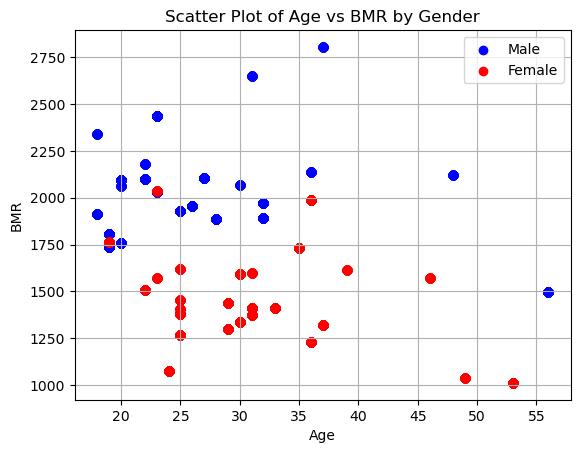

In [16]:
male_data = first[first['gender'] == 1]
female_data = first[first['gender'] == 0]

plt.scatter(male_data['age'], male_data['bmr'], color='blue', label='Male')
plt.scatter(female_data['age'], female_data['bmr'], color='red', label='Female')

plt.title('Scatter Plot of Age vs BMR by Gender')
plt.xlabel('Age')
plt.ylabel('BMR')
plt.legend()
plt.grid(True)
plt.show()

***The graph here shows that males will have a higher resting calorie burn rate than females.***

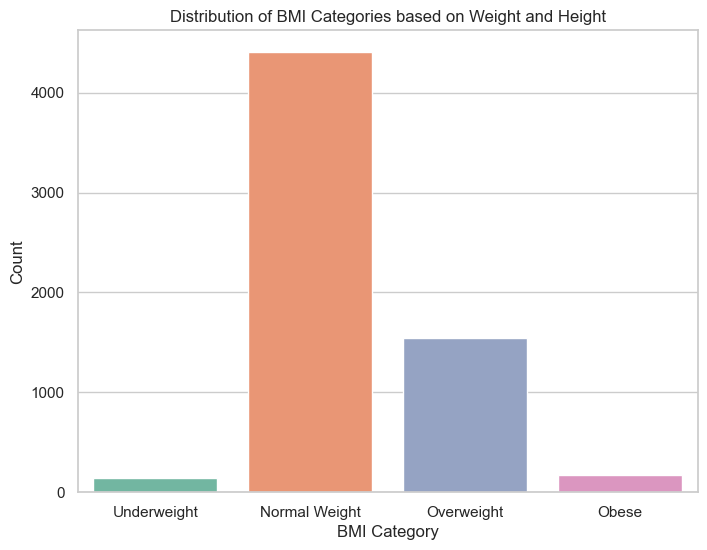

In [17]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

first['bmi category'] = first['bmi'].apply(categorize_bmi)

bmi_categories = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=first, x='bmi category', order=bmi_categories, palette="Set2")

plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories based on Weight and Height')

plt.show()

***We can see that the majority of the dataset is considered normal weight. The second highest category is overweight making it a good experiment for us to try and bring all categories towards the mean.***

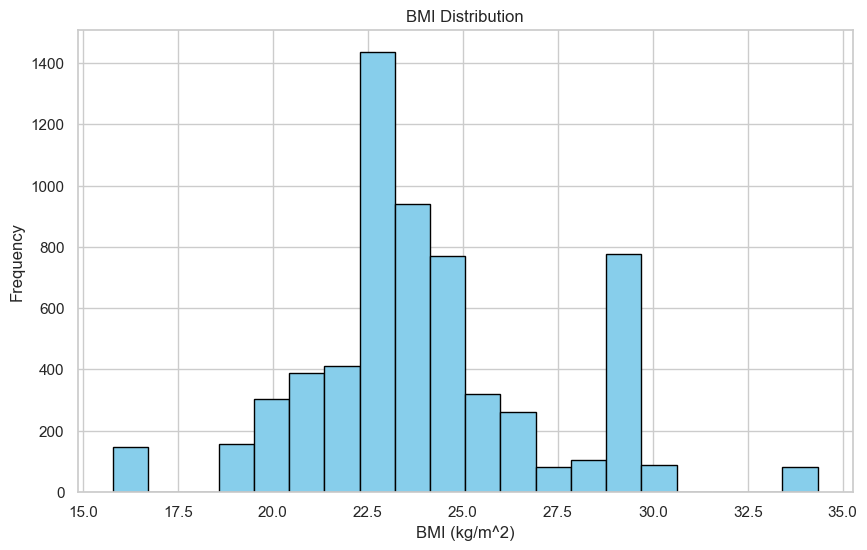

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(first['bmi'], bins=20, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI (kg/m^2)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

***We have a lot of people teetering on the line of overweight and then a spike near the end of people edging on falling under the obese category.***

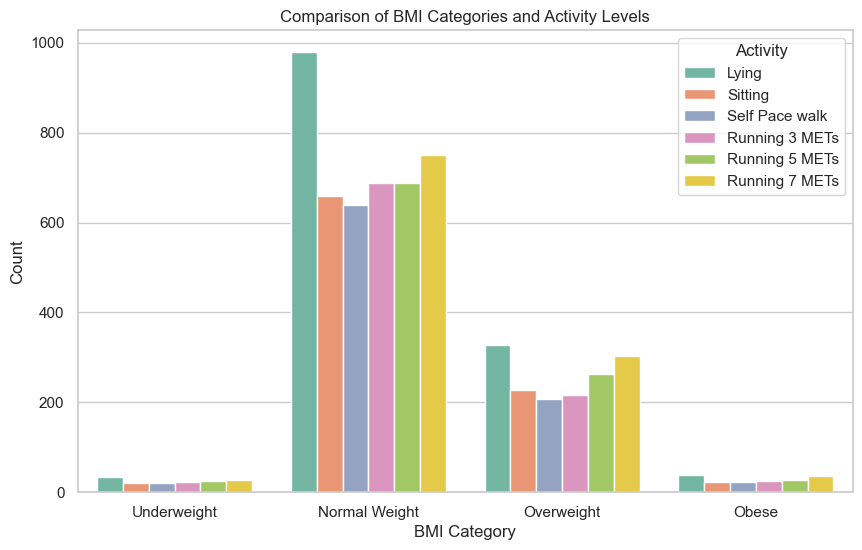

In [19]:
bmi_order = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=first, x='bmi category', hue='activity', palette="Set2", order=bmi_order)

plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Comparison of BMI Categories and Activity Levels')

plt.legend(title='Activity')
plt.show()

***Graph of basic activities performed by BMI category.***

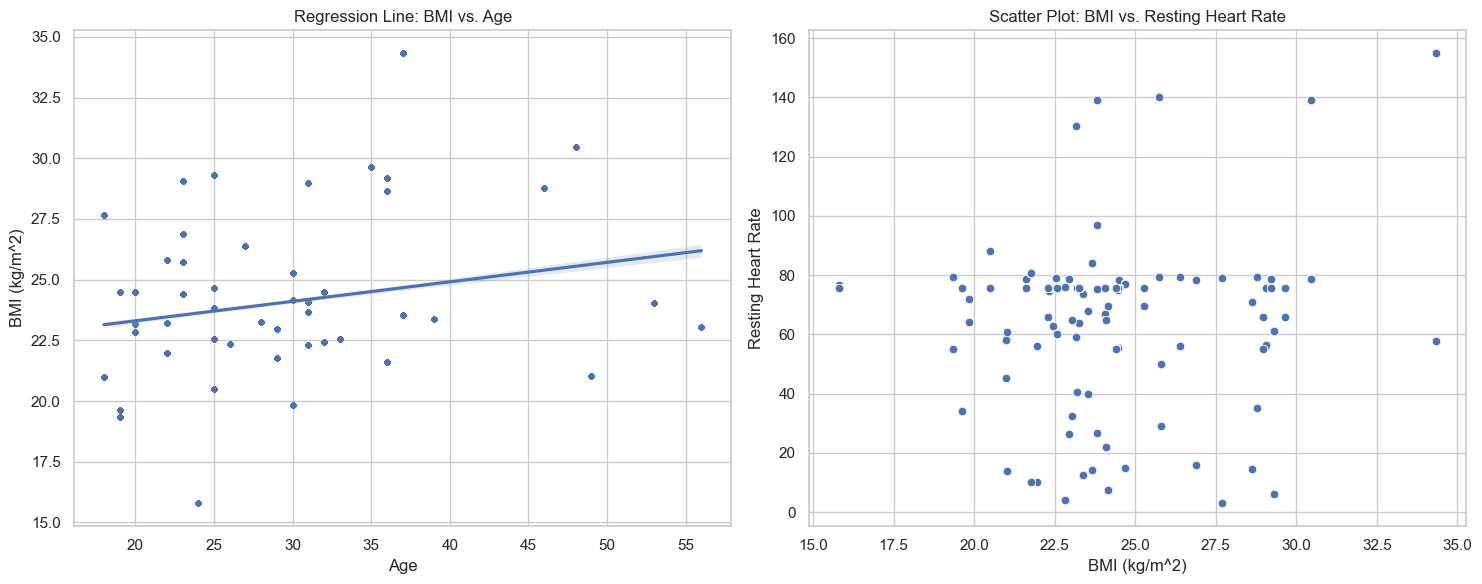

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Regression Line - BMI vs. Age
sns.regplot(data=first, x='age', y='bmi', scatter_kws={'s': 10}, ax=axes[0])
axes[0].set_title('Regression Line: BMI vs. Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('BMI (kg/m^2)')

# Scatter Plot - BMI vs. Resting Heart Rate
sns.scatterplot(data=first, x='bmi', y='resting_heart', ax=axes[1])
axes[1].set_title('Scatter Plot: BMI vs. Resting Heart Rate')
axes[1].set_xlabel('BMI (kg/m^2)')
axes[1].set_ylabel('Resting Heart Rate')

plt.tight_layout()
plt.show()

***We can see BMI naturally increases with age from our dataset. Resting heart rate seems to remain around 80 and below showing that the majority of the dataset is not at sever risk for hypertension besides those placing in the obese category.***

## Interactive Graphs

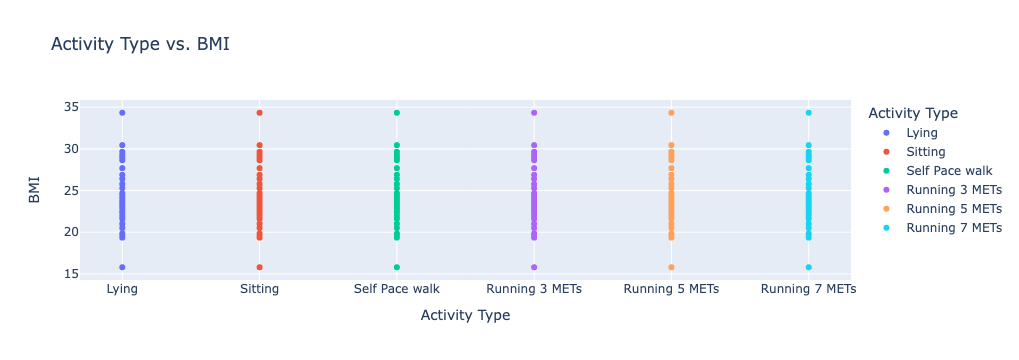

In [25]:
fig = px.scatter(first, x='activity', y='bmi', color='activity',
                 labels={'activity': 'Activity Type', 'bmi': 'BMI'},
                 title='Activity Type vs. BMI',
                 hover_name='activity')

# interactive plot
fig.show()

***More specific correlation between activity type and BMI to better understand each individual user.***

*If above graph not showing up on GitHub, see 'Activity_Type_vs_BMI.png' in Images folder.*

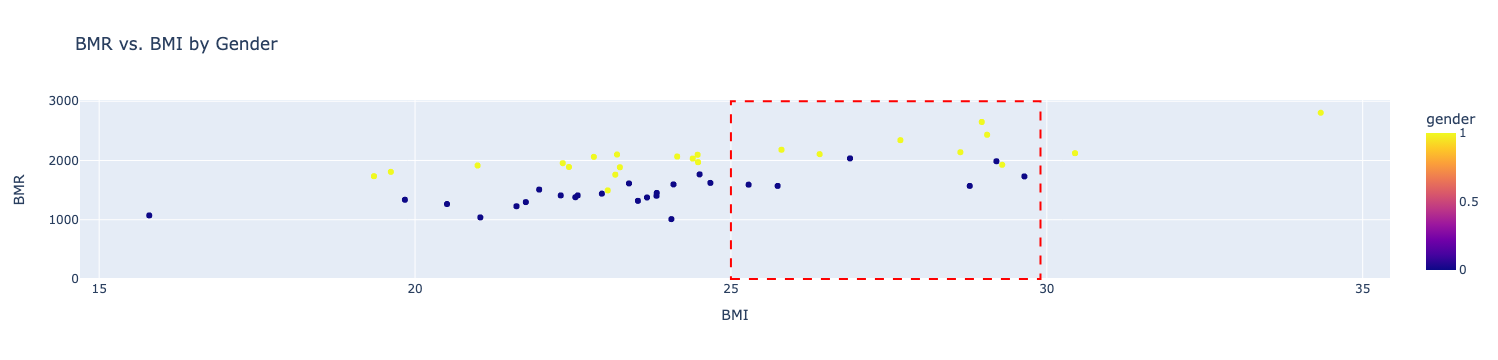

In [22]:
overweight_bmi_min = 25
overweight_bmi_max = 29.9

fig = px.scatter(first, x="bmi", y="bmr", color="gender", title="BMR vs. BMI by Gender")
fig.update_layout(
    xaxis_title="BMI",
    yaxis_title="BMR",
    legend_title="Gender"
)

fig.add_shape(
    type="rect",
    x0=overweight_bmi_min, y0=0,
    x1=overweight_bmi_max, y1=3000,  
    line=dict(color="red", width=2, dash="dash"),
)

fig.show()

***Graph above shows our specific target audience for our recommender system.***

*If above graph not showing up on GitHub, see 'BMR_vs_BMI_by_Gender.png' in Images folder.*

In [23]:
first.to_csv('../data/first_df.csv', index = False)